![R-Kenntnis](../Pics/header.png "R-Kenntnis")

<div class="alert alert-block alert-info">

* **Titel:** R-Kenntnis Lösung Übungen 07: Lineare Regression
* **Autor:** Prof. Dr. Denis Royer
* **Datum:** 30.11.2021 (Version 1.0)

</div>

# BI - R-Kenntnis Lösung Übungen 07: Lineare Regression

<div class="alert alert-block alert-warning">
<b>Wichtig:</b> Bevor wir loslegen, müssen wir zunächst einmal ein paar vorbereitende Dinge erledigen:

* Die notwendigen Packages laden (bspw. `tidyverse`)
* Datensatz laden (siehe *Data/marketing.csv*)

</div>

In [4]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
# Laden der Daten
marketing <- read_csv("../Data/marketing.csv")
# Wir wollen nur die nummerischen Anteile des Datensatzes nutzen:
adverts <- marketing[,1:5] # Spalten 1-5
# Erstellung des Linearen Modells
model1 <- lm(revenues ~ marketing_total, data = adverts)

Rows: 172 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): pop_density
dbl (6): google_adwords, facebook, twitter, marketing_total, revenues, emplo...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# Lösungen zu den Marketing Zahlen

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

***Frage:*** Was für Rückschlüsse bezüglich der Unabhängigkeit kann man bei den hier vorliegenden Daten treffen?

***Antwort:*** Die Daten sind unabhängig, da die Daten an verschiedenen Orten (Firmen) erhoben worden sind und sich somit nicht gegenseitig beeinflussen.


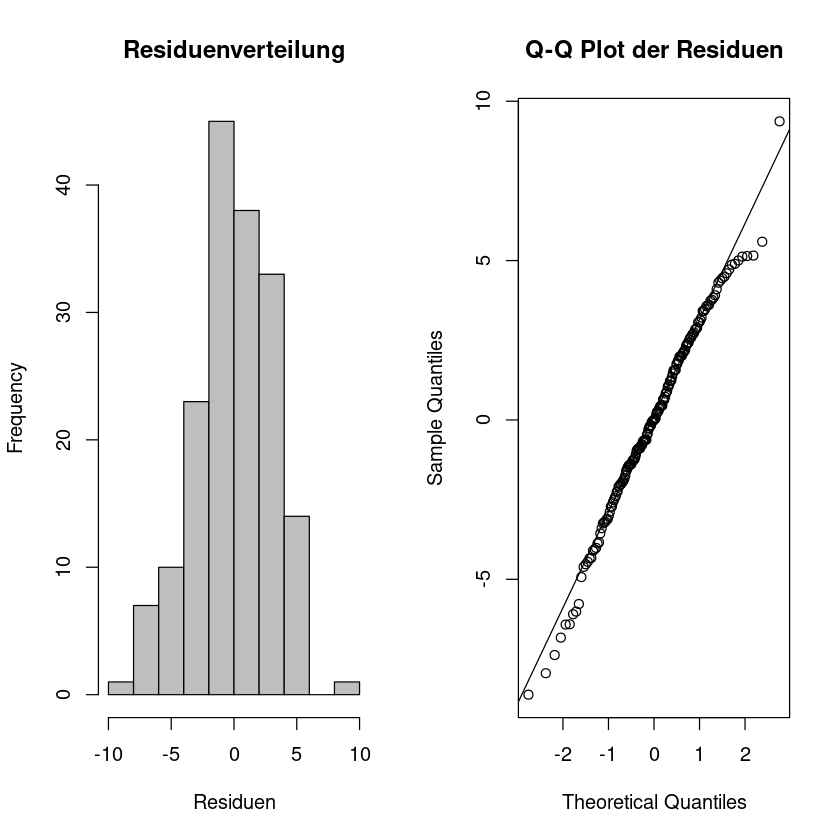

In [7]:
par(mfrow = c(1, 2)) # 2 Spalten für die Grafiken anlegen
# Ausgabe der Residuen als Histogram
hist(model1$residuals, xlab = "Residuen", col = "gray",
     main = "Residuenverteilung")

# Ausgabe der Residuen als Q-Q Plot
qqnorm(model1$residuals, main = "Q-Q Plot der Residuen")
qqline(model1$residuals) 

***Frage:*** Was kann man anhand der 2 Plots bezüglich der Residuen für Rückschlüsse ableiten?

***Antwort:*** *Die Residuen sind normalverteilt, damit ist die Bedingung gegeben!*

Fälle wie (D) und (E) zeigen einen quadratischen/ logarithmischen Zusammenhang. Die Residuen streuen also nicht zufällig, sondern es ist eine klare Systematik erkennbar. Oft hängt diese Annahmenverletzung mit Problemen der Nichtlinearität (zwischen abhängiger und unabhängiger Variable) zusammen.

Für das Modell aus der SLR für die Variablen *Marketing gesamt* und *Umsätze* ergibt sich hierbei folgender Residuenplot:

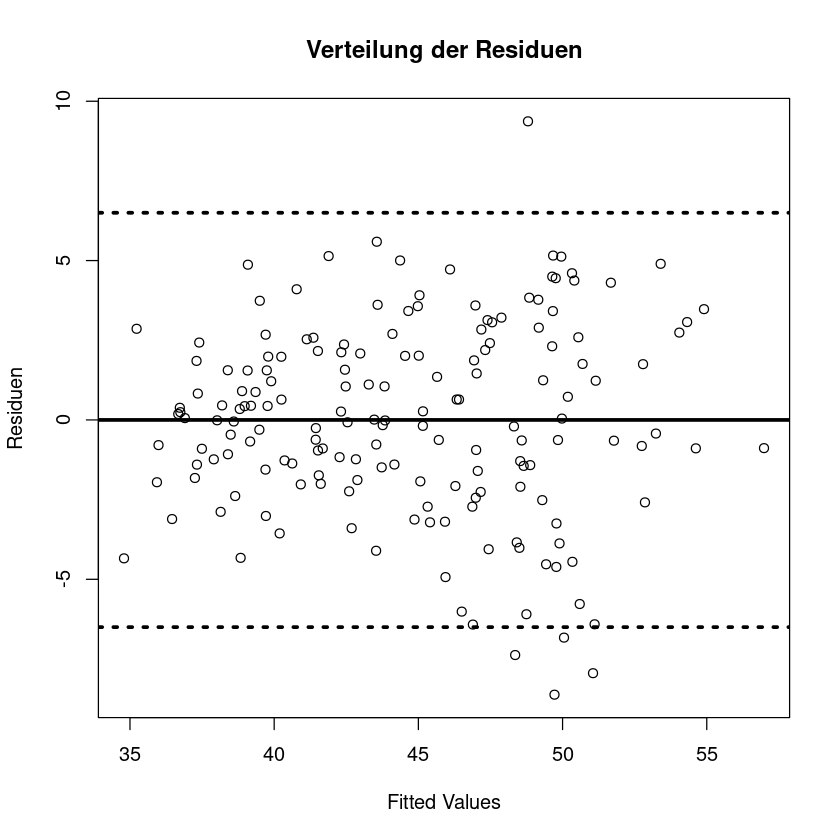

In [14]:
# Plot der Residuen des Linearen Modells
plot(model1$fitted.values, 
     model1$residuals, 
     ylab = "Residuen",
     xlab = "Fitted Values", 
     main = "Verteilung der Residuen")

# Hinzufügen der Mittellinie und der 2 gestrichelten Linien
# über und unter der Mittelllinie als Korridor
abline(0, 0, lwd = 3)
abline(h = c(-6.5, 6.5), lwd = 3, lty = 3)

In [ ]:
# Plot der Residuen des Linearen Modells
plot(model1$fitted.values, 
     model1$residuals, 
     ylab = "Residuen",
     xlab = "Fitted Values", 
     main = "Verteilung der Residuen")

# Hinzufügen der Mittellinie und der 2 gestrichelten Linien
# über und unter der Mittelllinie als Korridor
abline(0, 0, lwd = 3)
abline(h = c(-6.5, 6.5), lwd = 3, lty = 3)

***Frage:*** Welcher Typ von Varianz liegt beim Plot der Residuen aus dem Beispiel vor?

***Antwort:*** *Homoskedastizität ist erfüllt! Die Residuen verteilen sich ungefähr in einem gleichbleibend dickem horizontalen Band.*

# Übungen
## Aufgabe 1: Analyse und Transformation der Daten

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

Analysieren Sie die folgenden Daten mit dem "*L.U.N.K.*" Ansatz: 

* Fällt Ihnen was bei den Daten auf und wie lassen sich die Ergebnisse aus den einzelnen Schritten des L.U.N.K. Ansatzes interpretieren?
* Wie kann man ggf. den Datensatz "*reparieren*"?

In [ ]:
x0 <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y0 <- c(1.00, 1.41, 1.73, 2.00, 2.24,
        2.45, 2.65, 2.83, 3.00, 3.16)

## Aufgabe 2: Ausreißer

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

Ausreißer können große Einflüsse auf Lineare Modelle haben, wie auch im folgenden Beispielgrafik abgebildet:

In [ ]:
# Datensatz 1 - Ausreißer beeinflust
x2 <- 1:20
y2 <- c(1:10, 4, 12:20)
fit2 <- lm(y2 ~ x2)

In [ ]:
# Datensatz 2 - Ausreißer beeinflust nicht
x3 <- c(1:20, 30)
y3 <- c(0.4, 2.2, 2.2, 5.6, 5.3, 5.2, 7.5, 8.7, 9.6, 9.7, 12.5,
        12.4, 12.4, 11.8, 16.1, 16, 17, 18.9, 19.8, 20.6, 30.0)
fit3 <-lm(y3 ~ x3)

In [ ]:
# Plot der Datensätze
par(mfrow = c(1, 2))
plot(x2, y2, pch = 19, main = "Ausreißer beeinflust")
abline(fit2)
plot(x3, y3, pch = 19, main = "Ausreißer beeinflust nicht")
abline(fit3)

Analysieren Sie folgenden Datensatz:

* Hat der Datensatz einen Ausreißer? Wenn ja welcher Datensatz?
* Was für einen Einfluss hat der Datensatz? Vergleichen Sie die Linearen Modelle und Ihre Kennzahlen.

In [ ]:
x4 <- c(1:20)
y4 <- c(0.4, 2.2, 2.2, 5.6, 5.3, 5.2, 7.5, 8.7,
        9.6, 9.7, 12.5, 12.4, 12.4, 12.8, 16.1,
        16.0, 17.0, 11.5, 19.8, 20.6)